# Coupled oscillator with damping coefficient

This code solves the ODE x'' + 2*khi*w0*x' + w0^2*x = F0*cos(wd*t)+F1
khi is the damping constant, w0 is the resonant frequency, F0 is the driving 
force (coupling between PaceMaker and Halfcenter),Wd is the frequency of the 
driving force and x is the position (=w0), F1 step from the brain = w0^2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Setting up, time steps, consteants,... etc.

In [2]:
timeFinal= 15.0   # This is how far the graph will go in seconds
steps = 10000     # Number of steps
dT = timeFinal/steps      # Step length 
time = np.linspace(0, timeFinal, steps+1)   # Creates an array with steps+1 values from 0 to timeFinal


# Setting constants and initial values for velocity and position

w0 = 20.0  # natural frequency 20Hz 
vel0 = 0.0 # initial velocity
pos0 = 0.0 # initial position
Wd = w0    # frequency of driving PaceMakers
F_1 =(w0**2)*0.001  # Stimulation from higher centers = cste


### Defining functions

In [3]:
def Euler_solve(F_0, khi):
    
    # Allocating arrays for velocity and position
    vel = np.zeros(steps+1)
    pos = np.zeros(steps+1)
    
    vel[0] = vel0    #Sets the initial velocity for ctrl condition
    pos[0] = pos0    #Sets the initial position for ctrl condition
    
    for i in range(0, steps):
        if i< 500:
            F0= F_0
        else:
                F0= 0

        if i< 500:
            F1= F_1
        else:
                F1= 0
        vel[i+1] = -(w0**2)*dT*pos[i] + vel[i]*(1-(2*dT*khi*w0)) + (F0*dT)*np.cos(Wd*i*dT) + dT*F1
        pos[i+1] = dT*vel[i] + pos[i]
    
    return vel, pos

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[int(result.size/2):]

### Solving and plotting for 3 and 5 dpf for control an strychnine condition

In [4]:
# Here we emulate the different conditions tweakin with F_0 (PaceMaker coupling) 
# and khi (damping coeeficient) parameters:

# damping cste relating to str concentration: high str = high khi =0.5/ low = 0.1
khi_no_str = 0.1  
khi_str = 0.5
# PM coupling for age dependence 3dpf= high F0= 0.5 / 5dpf= low F0 = 0.01
F_0_3dpf = 0.5
F_0_5dpf = 0.01


# Solving for all different conditions:
pos_3dpf_ctrl = Euler_solve(F_0=F_0_3dpf, khi=khi_no_str)[1]
pos_3dpf_str = Euler_solve(F_0=F_0_3dpf, khi=khi_str)[1]
pos_5dpf_ctrl = Euler_solve(F_0=F_0_5dpf, khi=khi_no_str)[1]
pos_5dpf_str = Euler_solve(F_0=F_0_5dpf, khi=khi_str)[1]

# Compute autocorrelation for all different conditions:
corr_3dpf_ctrl=autocorr(pos_3dpf_ctrl)
corr_3dpf_str=autocorr(pos_3dpf_str)
corr_5dpf_ctrl=autocorr(pos_5dpf_ctrl)
corr_5dpf_str=autocorr(pos_5dpf_str)


### Plotting

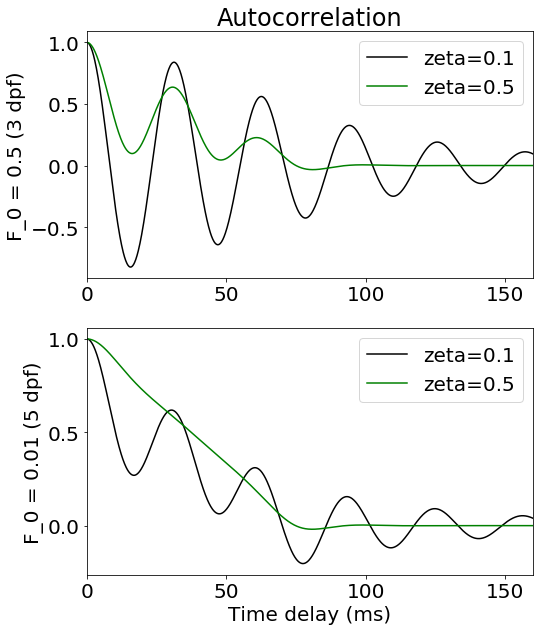

In [5]:
plt.figure(figsize=(8,10))
plt.rcParams.update({'font.size': 20})

plt.subplot(211)
plt.plot(time*100, corr_3dpf_ctrl/max(corr_3dpf_ctrl),'-k')
plt.plot(time*100, corr_3dpf_str/max(corr_3dpf_str),'-g')
plt.xlim([0,160])
#plt.xlabel('Time delay (ms)')
plt.ylabel('F_0 = 0.5 (3 dpf)')
plt.title('Autocorrelation')
plt.legend(['zeta=0.1', 'zeta=0.5'])
plt.yticks([-0.5, 0.0, 0.5, 1.0])
plt.xticks(np.arange(0,160,50))

plt.subplot(212)
plt.plot(time*100, corr_5dpf_ctrl/max(corr_5dpf_ctrl),'-k')
plt.plot(time*100, corr_5dpf_str/max(corr_5dpf_str),'-g')
plt.xlim([0,160])
plt.xlabel('Time delay (ms)')
plt.ylabel('F_0 = 0.01 (5 dpf)')
plt.legend(['zeta=0.1', 'zeta=0.5'])
plt.yticks([0.0, 0.5, 1.0])
plt.xticks(np.arange(0,160,50))

plt.show()